In [1]:
!unzip '/content/digit-recognizer.zip'

Archive:  /content/digit-recognizer.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


# 1. Implementation using sklearn

### 1) Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report

### 2) Loading and Auditing the Data

In [3]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [4]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


### 3) Prepare and Transform the Data

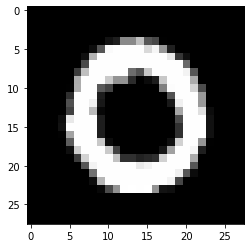

In [5]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0, 784)]
row_to_examine = 1
image_data = np.reshape(train[features][row_to_examine:row_to_examine+1].to_numpy(), (28, 28))
plt.imshow(image_data, cmap="gray")

In [6]:
X = train.iloc[:, 1:]
Y = train['label']

In [7]:
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


**Split the data into train & test sets**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


### 4) Set up the DL Model

**Implement the Single Layer Perceptron. Evaluate performance and discuss reasons of failure**

In [10]:
#verbose: used to show specified level of detailed info while running the model
#f1-score: harmonic mean of precision and recall
per = Perceptron(verbose=1)
per.fit(X_train, y_train)
pred_per = per.predict(X_test)
cm_slp = confusion_matrix(y_test, pred_per)
clas_rep_slp = classification_report(y_test, pred_per)
print(cm_slp)
print(clas_rep_slp)

#We look for f1-score for each digit

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.31 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.36 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.2s finished


In [11]:
per.coef_, per.coef_.shape, per.intercept_

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (10, 784),
 array([-1061.,  -213., -1456., -1105.,  -876.,   861., -1550.,  -148.,
        -3996., -1616.]))

In [12]:
from sklearn.neural_network import MLPClassifier

In [13]:
# start hidden_layer_sizes from (10, 10, 10) increase the size if accuracy increases along.
mlp = MLPClassifier(hidden_layer_sizes=(16, 16, 16), verbose=1, random_state=123)
mlp.fit(X_train, y_train)
preds_mlp = mlp.predict(X_test)

Iteration 1, loss = 3.94169702
Iteration 2, loss = 1.35736435
Iteration 3, loss = 1.01940349
Iteration 4, loss = 0.84244621
Iteration 5, loss = 0.73913542
Iteration 6, loss = 0.67797245
Iteration 7, loss = 0.64415324
Iteration 8, loss = 0.61427454
Iteration 9, loss = 0.58410470
Iteration 10, loss = 0.55879376
Iteration 11, loss = 0.49215218
Iteration 12, loss = 0.45592746
Iteration 13, loss = 0.42851116
Iteration 14, loss = 0.40318218
Iteration 15, loss = 0.38689829
Iteration 16, loss = 0.37453476
Iteration 17, loss = 0.35740677
Iteration 18, loss = 0.34135945
Iteration 19, loss = 0.33477586
Iteration 20, loss = 0.32580908
Iteration 21, loss = 0.31523972
Iteration 22, loss = 0.30116722
Iteration 23, loss = 0.29136387
Iteration 24, loss = 0.28558646
Iteration 25, loss = 0.27735506
Iteration 26, loss = 0.27266574
Iteration 27, loss = 0.27062563
Iteration 28, loss = 0.25933873
Iteration 29, loss = 0.25196397
Iteration 30, loss = 0.25438021
Iteration 31, loss = 0.24328995
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [14]:
cm_mlp = confusion_matrix(y_test, preds_mlp)
clasrep_mlp = classification_report(y_test, preds_mlp)
print(cm_mlp)
print(clasrep_mlp)

[[757   0   6   1   2   4   6   0   8   1]
 [  0 918  10   6   1   2   4   0   8   0]
 [ 11   2 778   9   6   4  11   3  14   0]
 [  2   6  35 775   0   8   2  12  13   5]
 [  1   5   1   2 741   3  13   1  10  19]
 [  5   1   7  35   0 717  14   1  15   5]
 [  6   6   3   0   7  12 825   0  10   1]
 [  3   7  18  14   5   2   0 790   2  19]
 [ 12  15  13  20   3   7  10   3 723  11]
 [  6   1   0  14  39   9   0  23  11 724]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       785
           1       0.96      0.97      0.96       949
           2       0.89      0.93      0.91       838
           3       0.88      0.90      0.89       858
           4       0.92      0.93      0.93       796
           5       0.93      0.90      0.91       800
           6       0.93      0.95      0.94       870
           7       0.95      0.92      0.93       860
           8       0.89      0.88      0.89       817
           9       0.92     

# 2. Implementation using Keras

### 1) Import Libraries

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

Convert Y into one hot encode

In [16]:
y_train_tc = to_categorical(y_train)
y_test_tc = to_categorical(y_test)

In [17]:
print(y_train_tc.shape)
print(y_test_tc.shape)

(33600, 10)
(8400, 10)


### 2) Initialize the model & Set up the layers

In [18]:
model = Sequential()
#Input Layer
model.add(Dense(16, activation='relu', input_dim=(784)))  #16 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 16 is added for 16 neurons
#784 x 16 = weights x neurons = 12544 + 16 biases = 12560
#dense 16 x dense_1 16 + 16 biases = 272
#dense_1 16 x dense_2 16 + 16 biases = 272
#dense_2 16 x dense_3 10 + 16 biases = 170
#Total Biases & Weights/Params = 13,274 are updated, each time in Backpropagation
#Step: 1 Batch (Eg: 10 images batch) iteration and accuracy calculation
#Epoch: 1 time all the batches iterations complete i.e All images or pixels.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
#'categorical_entropy': Sum(actualY*log(predictY))

In [20]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1050/1050 - 3s - loss: 2.7895 - accuracy: 0.1110 - val_loss: 2.3017 - val_accuracy: 0.1130 - 3s/epoch - 3ms/step
Epoch 2/100
1050/1050 - 2s - loss: 2.3012 - accuracy: 0.1112 - val_loss: 2.3017 - val_accuracy: 0.1130 - 2s/epoch - 2ms/step
Epoch 3/100
1050/1050 - 2s - loss: 2.3011 - accuracy: 0.1112 - val_loss: 2.3018 - val_accuracy: 0.1130 - 2s/epoch - 2ms/step
Epoch 4/100
1050/1050 - 2s - loss: 2.3011 - accuracy: 0.1112 - val_loss: 2.3018 - val_accuracy: 0.1130 - 2s/epoch - 2ms/step
Epoch 5/100
1050/1050 - 2s - loss: 2.3011 - accuracy: 0.1112 - val_loss: 2.3018 - val_accuracy: 0.1130 - 2s/epoch - 2ms/step
Epoch 6/100
1050/1050 - 2s - loss: 2.3011 - accuracy: 0.1112 - val_loss: 2.3019 - val_accuracy: 0.1130 - 2s/epoch - 2ms/step
Epoch 7/100
1050/1050 - 2s - loss: 2.3011 - accuracy: 0.1112 - val_loss: 2.3018 - val_accuracy: 0.1130 - 2s/epoch - 2ms/step
Epoch 8/100
1050/1050 - 2s - loss: 2.3011 - accuracy: 0.1112 - val_loss: 2.3018 - val_accuracy: 0.1130 - 2s/epoch - 2ms/step


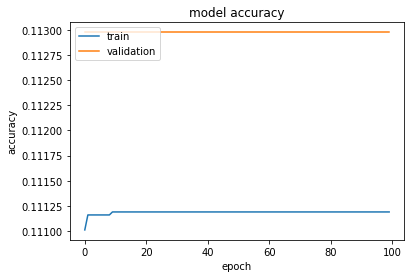

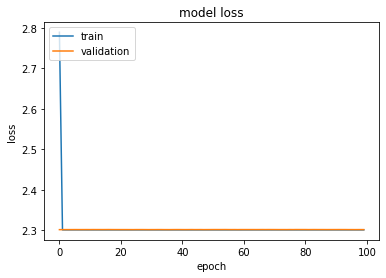

In [21]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
model.trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-0.04863448,  0.02083802,  0.04528196, ..., -0.01619969,
          0.00193149, -0.06692361],
        [-0.07905522, -0.07517016,  0.03712504, ...,  0.0713765 ,
          0.08284384, -0.00512788],
        [-0.03731411, -0.04940612, -0.05029535, ..., -0.05954055,
          0.01317054, -0.03257925],
        ...,
        [ 0.07076319,  0.00655716, -0.02902268, ..., -0.05709446,
         -0.00974949,  0.06863873],
        [-0.06968075, -0.06641649,  0.0238096 , ..., -0.01824293,
          0.06936722,  0.07401897],
        [-0.01317428,  0.06989998,  0.03736319, ..., -0.05556711,
         -0.00979865,  0.02826426]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(16,) dtype=float32, numpy=
 array([-0.00116547, -0.00069769, -0.00024514, -0.00021512, -0.0003158 ,
        -0.00029181, -0.00022967, -0.00044849, -0.00072811, -0.00033856,
        -0.00028306, -0.00026258, -0.00049041, -0.00238591, -0.00074762,
      

In [23]:
model = Sequential()
#Input Layer
model.add(Dense(16, activation='relu', input_dim=(784)))  #16 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1050/1050 - 3s - loss: 2.6970 - accuracy: 0.1127 - val_loss: 2.1238 - val_accuracy: 0.1937 - 3s/epoch - 3ms/step
Epoch 2/100
1050/1050 - 2s - loss: 2.0437 - accuracy: 0.2082 - val_loss: 2.0063 - val_accuracy: 0.2115 - 2s/epoch - 2ms/step
Epoch 3/100
1050/1050 - 2s - loss: 1.8747 - accuracy: 0.2776 - val_loss: 1.7179 - val_accuracy: 0.3440 - 2s/epoch - 2ms/step
Epoch 4/100
1050/1050 - 2s - loss: 1.5165 - accuracy: 0.4109 - val_loss: 1.3014 - val_accuracy: 0.4825 - 2s/epoch - 2ms/step
Epoch 5/100
1050/1050 - 2s - loss: 1.1043 - accuracy: 0.5707 - val_loss: 0.9080 - val_accuracy: 0.6417 - 2s/epoch - 2ms/step
Epoch 6/100
1050/1050 - 2s - loss: 0.8081 - accuracy: 0.7197 - val_loss: 0.7197 - val_accuracy: 0.7750 - 2s/epoch - 2ms/step
Epoch 7/100
1050/1050 - 2s - loss: 0.6090 - accuracy: 0.8276 - val_loss: 0.6068 - val_accuracy: 0.8420 - 2s/epoch - 2ms/step
Epoch 8/100
1050/1050 - 2s - loss: 0.5089 - accuracy: 0.8622 - val_loss: 0.4968 - val_accuracy: 0.8700 - 2s/epoch - 2ms/step


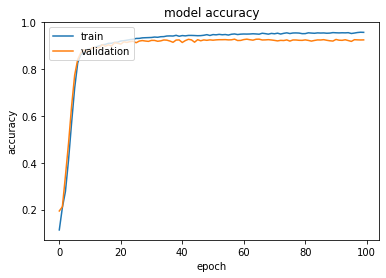

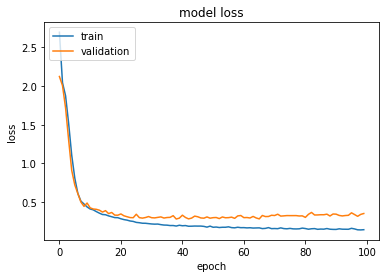

In [26]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [27]:
model = Sequential()
#Input Layer
model.add(Dense(32, activation='relu', input_dim=(784)))  #32 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 32 is added for 32 neurons
#784 x 32 = weights x neurons = 25,088 + 32 biases = 25120
#dense 32 x dense_1 32 + 32 biases = 1056
#dense_1 32 x dense_2 32 + 32 biases = 1056 
#dense_2 32 x dense_3 10 + 32 biases = 330
#Total Biases & Weights/Params = 27,562 are updated, each time in Backpropagation

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1050/1050 - 3s - loss: 1.5121 - accuracy: 0.6910 - val_loss: 0.5439 - val_accuracy: 0.8487 - 3s/epoch - 3ms/step
Epoch 2/100
1050/1050 - 2s - loss: 0.4287 - accuracy: 0.8786 - val_loss: 0.3968 - val_accuracy: 0.8956 - 2s/epoch - 2ms/step
Epoch 3/100
1050/1050 - 2s - loss: 0.3317 - accuracy: 0.9074 - val_loss: 0.3522 - val_accuracy: 0.9052 - 2s/epoch - 2ms/step
Epoch 4/100
1050/1050 - 2s - loss: 0.2823 - accuracy: 0.9218 - val_loss: 0.3004 - val_accuracy: 0.9167 - 2s/epoch - 2ms/step
Epoch 5/100
1050/1050 - 2s - loss: 0.2469 - accuracy: 0.9299 - val_loss: 0.2553 - val_accuracy: 0.9310 - 2s/epoch - 2ms/step
Epoch 6/100
1050/1050 - 2s - loss: 0.2193 - accuracy: 0.9371 - val_loss: 0.2728 - val_accuracy: 0.9257 - 2s/epoch - 2ms/step
Epoch 7/100
1050/1050 - 2s - loss: 0.1996 - accuracy: 0.9425 - val_loss: 0.2515 - val_accuracy: 0.9326 - 2s/epoch - 2ms/step
Epoch 8/100
1050/1050 - 2s - loss: 0.1872 - accuracy: 0.9464 - val_loss: 0.2748 - val_accuracy: 0.9306 - 2s/epoch - 2ms/step


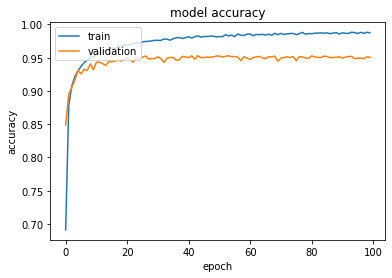

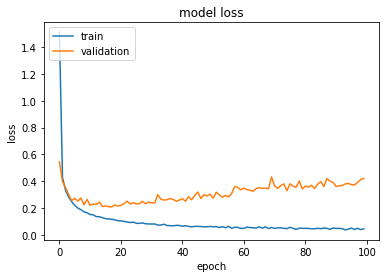

In [30]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
model = Sequential()
#Input Layer
model.add(Dense(64, activation='relu', input_dim=(784)))  #64 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 64 is added for 64 neurons
#784 x 64 = weights x neurons = 50,176 + 64 biases = 59,210
#dense 64 x dense_1 64 + 64 biases = 4160
#dense_1 64 x dense_2 64 + 64 biases = 4160 
#dense_2 64 x dense_3 10 + 64 biases = 650
#Total Biases & Weights/Params = 59,210 are updated, each time in Backpropagation

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1050/1050 - 3s - loss: 1.4096 - accuracy: 0.8044 - val_loss: 0.4627 - val_accuracy: 0.8895 - 3s/epoch - 3ms/step
Epoch 2/100
1050/1050 - 2s - loss: 0.3446 - accuracy: 0.9082 - val_loss: 0.3201 - val_accuracy: 0.9132 - 2s/epoch - 2ms/step
Epoch 3/100
1050/1050 - 3s - loss: 0.2437 - accuracy: 0.9316 - val_loss: 0.2352 - val_accuracy: 0.9346 - 3s/epoch - 2ms/step
Epoch 4/100
1050/1050 - 2s - loss: 0.1963 - accuracy: 0.9442 - val_loss: 0.2303 - val_accuracy: 0.9358 - 2s/epoch - 2ms/step
Epoch 5/100
1050/1050 - 2s - loss: 0.1729 - accuracy: 0.9501 - val_loss: 0.2145 - val_accuracy: 0.9448 - 2s/epoch - 2ms/step
Epoch 6/100
1050/1050 - 2s - loss: 0.1532 - accuracy: 0.9552 - val_loss: 0.2034 - val_accuracy: 0.9443 - 2s/epoch - 2ms/step
Epoch 7/100
1050/1050 - 2s - loss: 0.1403 - accuracy: 0.9589 - val_loss: 0.1951 - val_accuracy: 0.9480 - 2s/epoch - 2ms/step
Epoch 8/100
1050/1050 - 2s - loss: 0.1163 - accuracy: 0.9661 - val_loss: 0.2198 - val_accuracy: 0.9407 - 2s/epoch - 2ms/step


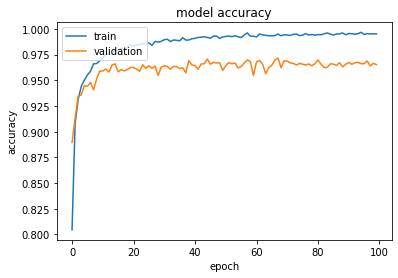

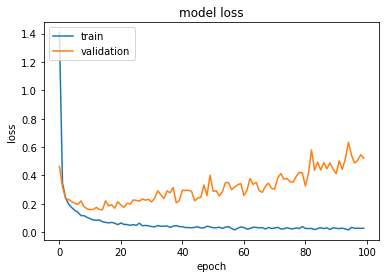

In [34]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [35]:
model = Sequential()
#Input Layer
model.add(Dense(128, activation='relu', input_dim=(784)))  #128 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dropout(0.2))  #Layer that drops neurons to avoid overfitting (20% neurons rate)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 128 is added for 128 neurons
#784 x 128 = weights x neurons = 100,352 + 128 biases = 100480
#dense 128 x dense_1 128 + 128 biases = 16512
#dense_1 128 x dense_2 128 + 128 biases = 16512 
#dense_2 128 x dense_3 10 + 128 biases = 1290
#Total Biases & Weights/Params = 134,794 are updated, each time in Backpropagation

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 10)               

In [36]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1050/1050 - 4s - loss: 2.6075 - accuracy: 0.6347 - val_loss: 0.4756 - val_accuracy: 0.8776 - 4s/epoch - 3ms/step
Epoch 2/100
1050/1050 - 3s - loss: 0.6270 - accuracy: 0.8302 - val_loss: 0.3199 - val_accuracy: 0.9161 - 3s/epoch - 3ms/step
Epoch 3/100
1050/1050 - 3s - loss: 0.4876 - accuracy: 0.8710 - val_loss: 0.3051 - val_accuracy: 0.9206 - 3s/epoch - 3ms/step
Epoch 4/100
1050/1050 - 3s - loss: 0.4277 - accuracy: 0.8869 - val_loss: 0.2747 - val_accuracy: 0.9312 - 3s/epoch - 3ms/step
Epoch 5/100
1050/1050 - 3s - loss: 0.3826 - accuracy: 0.8982 - val_loss: 0.2475 - val_accuracy: 0.9405 - 3s/epoch - 3ms/step
Epoch 6/100
1050/1050 - 3s - loss: 0.3648 - accuracy: 0.9056 - val_loss: 0.2380 - val_accuracy: 0.9386 - 3s/epoch - 3ms/step
Epoch 7/100
1050/1050 - 3s - loss: 0.3291 - accuracy: 0.9127 - val_loss: 0.2361 - val_accuracy: 0.9400 - 3s/epoch - 3ms/step
Epoch 8/100
1050/1050 - 3s - loss: 0.3261 - accuracy: 0.9134 - val_loss: 0.2224 - val_accuracy: 0.9431 - 3s/epoch - 3ms/step


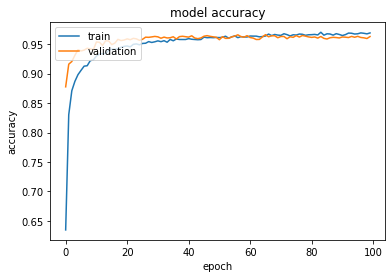

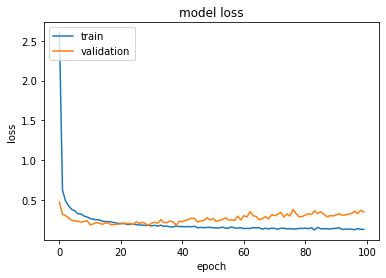

In [38]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
model = Sequential()
#Input Layer
model.add(Dense(256, activation='relu', input_dim=(784)))  #256 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dropout(0.2))  #Layer that drops neurons to avoid overfitting (20% neurons rate)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 256 is added for 256 neurons
#784 x 256 = weights x neurons = 200,704 + 256 biases = 200960
#dense 256 x dense_1 256 + 256 biases = 65792
#dense_1 256 x dense_2 256 + 256 biases = 65792 
#dense_2 256 x dense_3 10 + 256 biases = 2570
#Total Biases & Weights/Params = 335,114 are updated, each time in Backpropagation

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 10)               

In [40]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1050/1050 - 6s - loss: 2.4546 - accuracy: 0.7680 - val_loss: 0.3450 - val_accuracy: 0.9064 - 6s/epoch - 5ms/step
Epoch 2/100
1050/1050 - 5s - loss: 0.4194 - accuracy: 0.8845 - val_loss: 0.2549 - val_accuracy: 0.9299 - 5s/epoch - 5ms/step
Epoch 3/100
1050/1050 - 5s - loss: 0.3398 - accuracy: 0.9073 - val_loss: 0.2213 - val_accuracy: 0.9396 - 5s/epoch - 5ms/step
Epoch 4/100
1050/1050 - 5s - loss: 0.2984 - accuracy: 0.9174 - val_loss: 0.2023 - val_accuracy: 0.9433 - 5s/epoch - 4ms/step
Epoch 5/100
1050/1050 - 5s - loss: 0.2820 - accuracy: 0.9240 - val_loss: 0.2053 - val_accuracy: 0.9437 - 5s/epoch - 5ms/step
Epoch 6/100
1050/1050 - 5s - loss: 0.2514 - accuracy: 0.9324 - val_loss: 0.2853 - val_accuracy: 0.9311 - 5s/epoch - 4ms/step
Epoch 7/100
1050/1050 - 5s - loss: 0.2495 - accuracy: 0.9350 - val_loss: 0.2678 - val_accuracy: 0.9426 - 5s/epoch - 5ms/step
Epoch 8/100
1050/1050 - 5s - loss: 0.2354 - accuracy: 0.9388 - val_loss: 0.1717 - val_accuracy: 0.9554 - 5s/epoch - 4ms/step


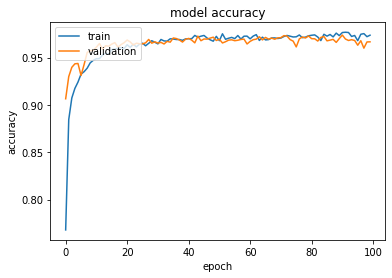

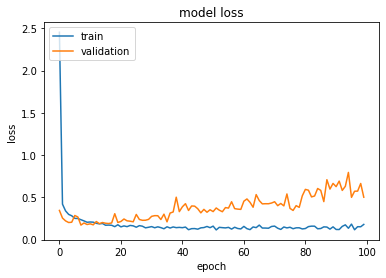

In [42]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [44]:
preds_final = model.predict(test)

In [45]:
preds_final

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2839306e-38, 0.0000000e+00, 0.0000000e+00, ..., 1.0551602e-06,
        1.7999999e-15, 9.9999893e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.5150925e-12,
        9.9908917e-30, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [46]:
preds_final.shape

(28000, 10)

In [48]:
preds_final_class = pd.DataFrame(np.argmax(preds_final, axis=1))
preds_final_class.describe()

,0
count,28000.000000
mean,4.511750
std,2.896504
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [52]:
sample_submission = pd.read_csv('sample_submission.csv')

In [53]:
sample_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [54]:
sample_submission['Label'] = preds_final_class

In [55]:
sample_submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,8
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [58]:
sample_submission.to_csv('Final_Submission.csv', index=False)

In [59]:
sample_submission.describe()

,ImageId,Label
count,28000.000000,28000.000000
mean,14000.500000,4.511750
std,8083.048105,2.896504
min,1.000000,0.000000
25%,7000.750000,2.000000
50%,14000.500000,4.000000
75%,21000.250000,7.000000
max,28000.000000,9.000000
